## NAIVE BAYES
## Titanic Survival Dataset

## IMPORT NECESSARY LIBRARIES.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

## 1. Load the Titanic Dataset AND look at the top five rows.

In [4]:
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Print All Target Labels.

In [5]:
print("Target labels (Survived):", df['Survived'].unique())

Target labels (Survived): [0 1]


## 3. Prepare Subset of Categories.

In [7]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


## 4. Load Train & Test Subsets (with preprocessing).

In [8]:
df.dropna(inplace=True)

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
889,1,1,1,26.0,0,0,30.0000


## 5. Print new training set target names (Labels).

In [10]:
print("Training labels:", np.unique(y_train))

Training labels: [0 1]


## 6. print 5th Training Sample.

In [11]:
print("5th training sample:\n", X_train.iloc[4])

5th training sample:
 Pclass     2.0
Sex        1.0
Age       25.0
SibSp      0.0
Parch      0.0
Fare      13.0
Name: 666, dtype: float64


## 7. Print Shape of Data and Targets.

In [12]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (571, 6)
Shape of y_train: (571,)


## 8. Print Training Set Feature Names.

In [13]:
print("Training Set Feature Names:", list(X_train.columns))

Training Set Feature Names: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']


## 9. Train Data into Numerical Format using CountVectorizer (not applicable here, but showing BernoulliNB).
Since Titanic data is already numerical, we skip CountVectorizer. Use BernoulliNB:

In [14]:
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB()

## 10. Predict Target Labels for Test Set.

In [15]:
y_pred = model.predict(X_test)

## 11. Find Accuracy Score.

In [16]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.7342657342657343


## 12. Use TfidfVectorizer & MultinomialNB (not applicable directly).
Tfidf is for text. However, we simulate this with numeric Titanic data for MultinomialNB:

In [18]:
model_multi = MultinomialNB()
model_multi.fit(X_train, y_train)
y_pred_multi = model_multi.predict(X_test)
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_multi))

MultinomialNB Accuracy: 0.6223776223776224


## Try with avoiding stopwords (Not applicable for Titanic)
This is only relevant for text processing (like in 20 newsgroups). Skip for Titanic.

## 13. Final Evaluation.

In [19]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[69 18]
 [20 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78        87
           1       0.67      0.64      0.65        56

    accuracy                           0.73       143
   macro avg       0.72      0.72      0.72       143
weighted avg       0.73      0.73      0.73       143



## DATA VISUALIZATION.

## 1. Survival Count (Target Distribution).

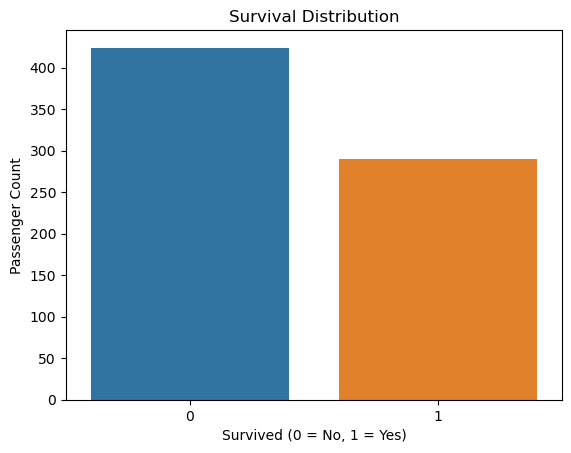

In [21]:
sns.countplot(data=df, x='Survived')
plt.title('Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Count')
plt.show()

## 2. Survival by Gender.

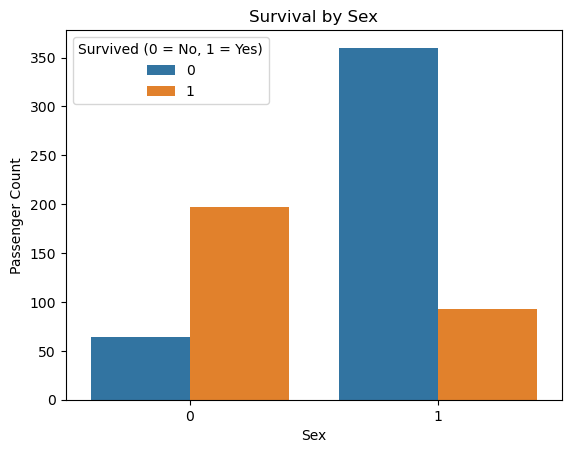

In [23]:
df['Survived'] = df['Survived'].astype(str)

sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Passenger Count')
plt.legend(title='Survived (0 = No, 1 = Yes)')
plt.show()

## 3. Age Distribution.

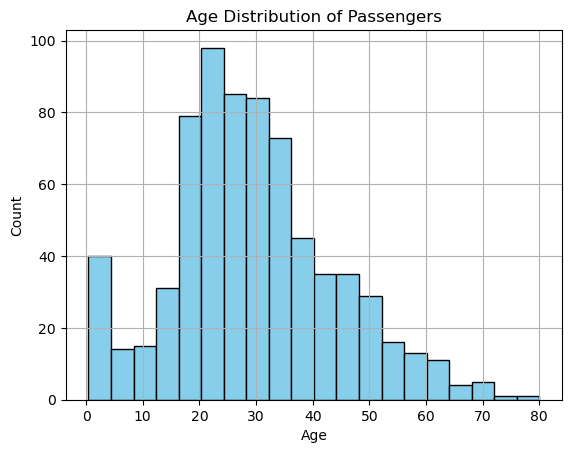

In [24]:
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## 4. Survival by Passenger Class.

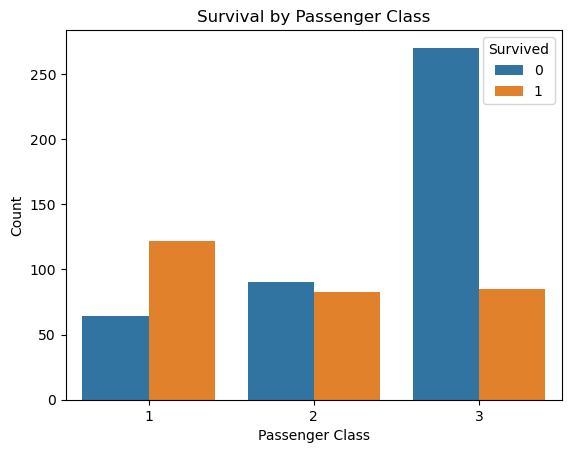

In [25]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

## 5. Confusion Matrix Heatmap.

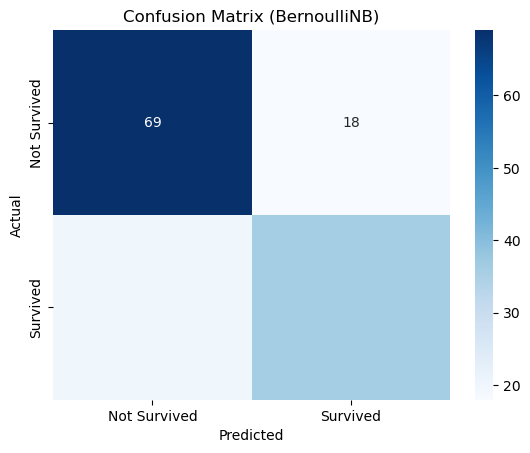

In [26]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (BernoulliNB)')
plt.show()

## 6. Feature Correlation Heatmap.

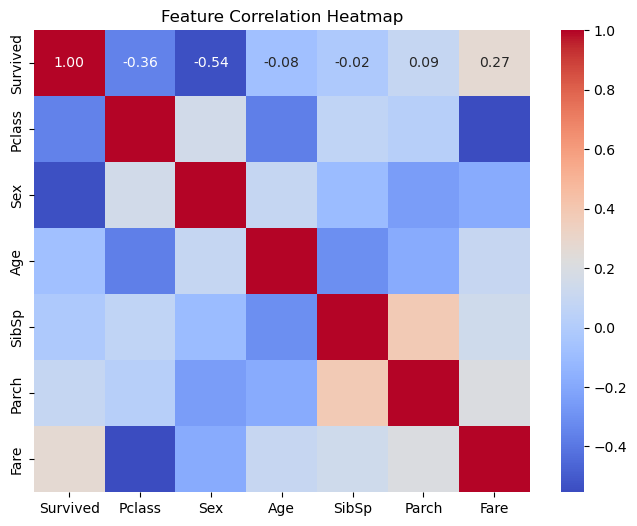

In [27]:
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()